# Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import statsmodels.api as sm

In [3]:
Data = pd.read_excel('CropRawData.xlsx',sheet_name='Master',engine='openpyxl',skiprows=1)

In [4]:
#Treats = Data.loc[:,'TRT ID'].drop_duplicates().values

In [5]:
Treats = ['2D','7D', '14D','21D', 'MD','LD']

In [6]:
HarvData = Data.loc[Data.Date=='2022-01-20',:]
RDData = Data.loc[Data.Date=='2022-01-11',['Plot','RD1','RD2','RD3','RD4','RD5']]
RDData.set_index('Plot',inplace=True)
ExpDes = pd.read_pickle('ExpDes')

In [7]:
dfilt = (HarvData.loc[:,'TRT ID'] == '7D') & (HarvData.loc[:,'Location'] == 'Rainshelter')

In [8]:
var = ['Plant count','Corrected Pea Weight 12%','1000 SW corrected to 12%','Peas per plant','Nodes with Pods','Pods per plant','Yield per plant']
titlabs = ['Population','Yield @ 12% moisture', '1000 seed weight','Seed Number','Reproductive Nodes','Pod Number','Plant Yield']
ylabs = ['plant/m2','t/ha','g','/plant', '/plant','/plant', 'g/plant']
Names = pd.DataFrame(index=var,data=np.transpose([titlabs,ylabs]),columns=['Name','Unit'])

In [9]:
Names

,Name,Unit
Plant count,Population,plant/m2
Corrected Pea Weight 12%,Yield @ 12% moisture,t/ha
1000 SW corrected to 12%,1000 seed weight,g
Peas per plant,Seed Number,/plant
Nodes with Pods,Reproductive Nodes,/plant
Pods per plant,Pod Number,/plant
Yield per plant,Plant Yield,g/plant


In [10]:
HarvData.columns

Index([                     'Date',                  'Location',
                            'Plot',                       'Rep',
                             'TRT',                    'TRT ID',
                           'Plant',               'Plant count',
              'Plant count per m2',                           1,
                                 2,                           3,
                       'Mean node',    'Total Fresh weight (g)',
        'Total Fresh WT pods+peas',        'Fresh plant wt (g)',
              'Sub sample Stem FW',         'Sub sample FW (g)',
       'Sub sample dry weight (g)',     'Total dry weight (g) ',
                          'DW (%)',                  'DW/plant',
                  'Tot Pod Number',                'Tot pod FW',
                             '1.1',                       '2.1',
                             '3.1',           'Pod no. Average',
                             '1.2',                       '2.2',
                         

In [11]:
RDData = pd.concat([ExpDes,RDData.dropna()],axis=1)

In [12]:
RDData.columns

Index(['Trial', 'Block', 'TrtNum', 'Irrig', 'RD1', 'RD2', 'RD3', 'RD4', 'RD5'], dtype='object')

In [13]:
RDData.loc[RDData.Trial=='Rainshelter',['Irrig', 'RD1', 'RD2', 'RD3', 'RD4', 'RD5']].set_index('Irrig').mean(axis=1).reset_index(drop=False)

,Irrig,0
0,21D,3.4
1,MD,3.2
2,2D,3.4
3,LD,3.0
4,7D,3.8
5,14D,2.4
6,MD,4.0
7,14D,2.6
8,7D,2.4
9,2D,3.2


In [14]:
AnovaData = RDData.loc[RDData.Trial=='Rainshelter',['Irrig', 'RD1', 'RD2', 'RD3', 'RD4', 'RD5']].set_index('Irrig').mean(axis=1).reset_index(drop=False)
AnovaData.columns = ['trt','var']
model=ols('var ~ C(trt)',data=AnovaData).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
    

In [15]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(trt),5.0,0.608333,0.121667,0.41556,0.831758
Residual,18.0,5.270000,0.292778,NaN,NaN


In [16]:
RDData

,Trial,Block,TrtNum,Irrig,RD1,RD2,RD3,RD4,RD5
Plot,,,,,,,,,
101,Rainshelter,1,4,21D,3.0,3.0,3.0,4.0,4.0
102,Rainshelter,1,5,MD,2.0,3.0,3.0,4.0,4.0
103,Rainshelter,1,1,2D,2.0,3.0,3.0,4.0,5.0
104,Rainshelter,1,6,LD,2.0,2.0,3.0,4.0,4.0
105,Rainshelter,1,2,7D,3.0,4.0,4.0,4.0,4.0
106,Rainshelter,1,3,14D,2.0,2.0,2.0,3.0,3.0
107,Rainshelter,2,5,MD,4.0,4.0,4.0,5.0,3.0
108,Rainshelter,2,3,14D,2.0,2.0,2.0,3.0,4.0
109,Rainshelter,2,2,7D,2.0,2.0,2.0,3.0,3.0


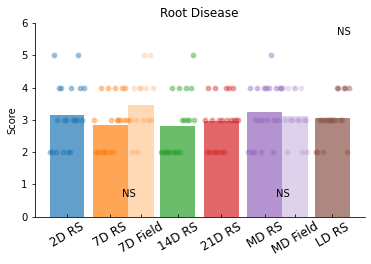

In [20]:
Graph = plt.figure(figsize=(10,10))
pos = 1
Axis = Graph.add_subplot(3,2,pos)
xPos = 0
tPos = 0
xticks = []
xlabs = []
ymax=6
    
AnovaData = RDData.loc[RDData.Trial=='Rainshelter',['Irrig', 'RD1', 'RD2', 'RD3', 'RD4', 'RD5']].set_index('Irrig').mean(axis=1).reset_index(drop=False)
AnovaData.columns = ['trt','var']
model=ols('var ~ C(trt)',data=AnovaData).fit()
anova_table=sm.stats.anova_lm(model,typ=1)
p = round(anova_table.loc['C(trt)','PR(>F)'],3)
edf = anova_table.loc['Residual','df']
ems = anova_table.loc['Residual','mean_sq']
lsd = round(3.184*np.sqrt((2*ems)/edf),2)

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for t in Treats:
    tag = 'RS'
    xoffset = 0
    for l in ['Rainshelter','A3.2']:
        dfilt = (RDData.loc[:,'Irrig'] == t) & (RDData.loc[:,'Trial'] == l)
        y = RDData.loc[dfilt,['Irrig', 'RD1', 'RD2', 'RD3', 'RD4', 'RD5']].set_index('Irrig').melt().dropna().value.values
        if y.size > 0:
            if l == 'A3.2':
                tag = 'Field'
                xPos -= xoffset
            xlabs.append(t+' '+tag)
            x = []
            for i in list(range(y.size)):
                x.append(xPos)
                xPos +=1
            midx = np.mean(x)
            xticks.append(midx)
            if l == 'Rainshelter':
                al = 0.7
            else:
                al = 0.3
            plt.bar(midx,np.mean(y),y.size,
                        edgecolor=colors[tPos], color = colors[tPos],
                        linewidth=0,alpha=al)
            plt.plot(x,y, 'o', markersize = 4, mew=2,mec = colors[tPos],
                     mfc= colors[tPos], alpha = al*.5, label = l + " " + t)
            xoffset = y.size*.25                
            xPos += xoffset
        if t in ['7D','MD'] and (l == 'Rainshelter'):
            RS = RDData.loc[(RDData.loc[:,'Trial'] == 'Rainshelter') & (RDData.loc[:,'Irrig']==t),:].mean(axis=1).values
            Field = RDData.loc[(RDData.loc[:,'Trial'] == 'A3.2') & (RDData.loc[:,'Irrig']==t),:].mean(axis=1).values
            p1 = f_oneway(RS,Field).pvalue
            ctext = ''
            if p1 > 0.054:
                ctext = 'NS'
            else:
                ctext = 'p = ' + str(p1)[:4]
            plt.text(xPos-xoffset, ymax*.1,ctext,horizontalalignment='center')

        plt.ylim(0,ymax)
    tPos+=1

if p < 0.054: 
    plt.plot([xPos,xPos],[ymax,ymax-lsd],'-_',color='k')
    plt.text(xPos*.98,ymax-lsd/2,'LSD',horizontalalignment='right',verticalalignment='center')
    if p < 0.001:
        ptext = 'p < 0.001'
    else:
        ptext = 'p = ' +str(p)
    plt.text(xPos*.89,ymax-lsd/2, ptext,horizontalalignment='right',verticalalignment='center')
else:
    plt.text(xPos-5,ymax-lsd/2, 'NS',horizontalalignment='right',verticalalignment='center')
Axis.xaxis.set_ticks(xticks)
Axis.set_xticklabels(xlabs)
Axis.spines['right'].set_visible(False)
Axis.spines['top'].set_visible(False)
plt.tick_params(axis='x',direction='in',labelsize = 12,rotation=30)
plt.ylabel('Score')
plt.title('Root Disease')
pos +=1
plt.tight_layout()

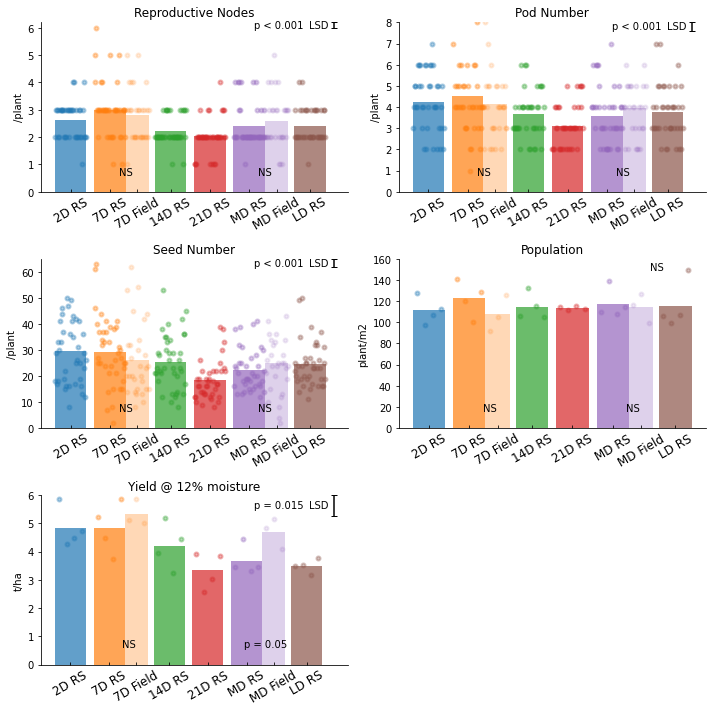

In [49]:
Graph = plt.figure(figsize=(10,10))
ymaxs = [6.20,8,65,160,6]
uc = [1,1,1,1,100]
pos = 1
for var in ['Nodes with Pods','Pods per plant','Peas per plant','Plant count','Corrected Pea Weight 12%']:
    Axis = Graph.add_subplot(3,2,pos)
    ymax = ymaxs[pos-1]
    xPos = 0
    tPos = 0
    xticks = []
    xlabs = []
    
    AnovaData = HarvData.loc[HarvData.Location=='Rainshelter',['TRT ID',var]].dropna()
    AnovaData.columns = ['trt','var']
    model=ols('var ~ C(trt)',data=AnovaData).fit()
    anova_table=sm.stats.anova_lm(model,typ=1)
    p = round(anova_table.loc['C(trt)','PR(>F)'],3)
    edf = anova_table.loc['Residual','df']
    ems = anova_table.loc['Residual','mean_sq']
    lsd = round(3.184*np.sqrt((2*ems)/edf),2)/uc[pos-1]

    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
    
    for t in Treats:
        tag = 'RS'
        xoffset = 0
        for l in ['Rainshelter','Column A3.2']:
            dfilt = (HarvData.loc[:,'TRT ID'] == t) & (HarvData.loc[:,'Location'] == l)
            y = HarvData.loc[dfilt,var].dropna()/uc[pos-1]
            if y.size > 0:
                if l == 'Column A3.2':
                    tag = 'Field'
                    xPos -= xoffset
                xlabs.append(t+' '+tag)
                x = []
                for i in list(range(y.size)):
                    x.append(xPos)
                    xPos +=1
                midx = np.mean(x)
                xticks.append(midx)
                if l == 'Rainshelter':
                    al = 0.7
                else:
                    al = 0.3
                plt.bar(midx,np.mean(y),y.size,
                            edgecolor=colors[tPos], color = colors[tPos],
                            linewidth=0,alpha=al)
                plt.plot(x,y, 'o', markersize = 4, mew=2,mec = colors[tPos],
                         mfc= colors[tPos], alpha = al*.5, label = l + " " + t)
                xoffset = y.size*.25                
                xPos += xoffset
            if t in ['7D','MD'] and (l == 'Rainshelter'):
                RS = HarvData.loc[(HarvData.loc[:,'Location'] == 'Rainshelter') & (HarvData.loc[:,'TRT ID']==t),var].dropna().values
                Field = HarvData.loc[(HarvData.loc[:,'Location'] == 'Column A3.2') & (HarvData.loc[:,'TRT ID']==t),var].dropna().values
                p1 = f_oneway(RS,Field).pvalue
                ctext = ''
                if p1 > 0.054:
                    ctext = 'NS'
                else:
                    ctext = 'p = ' + str(p1)[:4]
                plt.text(xPos-xoffset, ymax*.1,ctext,horizontalalignment='center')

            plt.ylim(0,ymax)
        tPos+=1
    
    if p < 0.054: 
        plt.plot([xPos,xPos],[ymax,ymax-lsd],'-_',color='k')
        plt.text(xPos*.98,ymax-lsd/2,'LSD',horizontalalignment='right',verticalalignment='center')
        if p < 0.001:
            ptext = 'p < 0.001'
        else:
            ptext = 'p = ' +str(p)
        plt.text(xPos*.89,ymax-lsd/2, ptext,horizontalalignment='right',verticalalignment='center')
    else:
        plt.text(xPos-5,ymax-lsd/2, 'NS',horizontalalignment='right',verticalalignment='center')
    Axis.xaxis.set_ticks(xticks)
    Axis.set_xticklabels(xlabs)
    Axis.spines['right'].set_visible(False)
    Axis.spines['top'].set_visible(False)
    plt.tick_params(axis='x',direction='in',labelsize = 12,rotation=30)
    plt.ylabel(Names.loc[var,'Unit'])
    plt.title(Names.loc[var,'Name'])
    pos +=1
plt.tight_layout()

In [21]:
ExpDes = pd.read_pickle('ExpDes')
HarvDataByPlot = HarvData.groupby('Plot').mean().loc[:,['Plant count','Corrected Pea Weight 12%','1000 SW corrected to 12%','Peas per plant','Nodes with Pods','Pods per plant']]
HarvDataByPlot = pd.concat([ExpDes,HarvDataByPlot],axis=1)
HarvDataByPlot.loc[:,'Yield per plant'] = HarvDataByPlot.loc[:,'Corrected Pea Weight 12%']/HarvDataByPlot.loc[:,'Plant count']
HarvDataByPlot.loc[:,'Corrected Pea Weight 12%'] = HarvDataByPlot.loc[:,'Corrected Pea Weight 12%']/100

In [44]:
ind = ['Name','xvar','yvar','xmax','xmin','bmax','bmin','slopetext']
podSet = ['Pod set','Nodes with Pods','Pods per plant',4.5,1.5,1.8,1.3,'pods/node']
seedSet = ['Seed set', 'Pods per plant','Peas per plant',7,2.5,7.5, 5.5,'seeds/pod']
seedSize = ['Seed size','Peas per plant','Yield per plant',55,10,0.2,0.11, 'g/seed']
population = ['Population','Yield per plant','Corrected Pea Weight 12%',6,1,1.4,0.95,'M plants/ha']
gParams = pd.DataFrame(index = ind,data=np.transpose([podSet,seedSet,seedSize,population]))
gParams.columns = gParams.iloc[0,:]
gParams.drop('Name',axis=0,inplace=True)

In [23]:
gParams

Name,Pod set,Seed set,Seed size,Population
xvar,Nodes with Pods,Pods per plant,Peas per plant,Yield per plant
yvar,Pods per plant,Peas per plant,Yield per plant,Corrected Pea Weight 12%
xmax,4.5,7,55,6
xmin,1.5,2.5,10,1
bmax,1.8,7.5,0.2,1.4
bmin,1.2,5.5,0.1,0.95
slopetext,pods/node,seeds/pod,g/seed,M plants/ha


In [33]:
HarvDataByPlot.loc[filt,xvar]

Series([], Name: Yield per plant, dtype: float64)

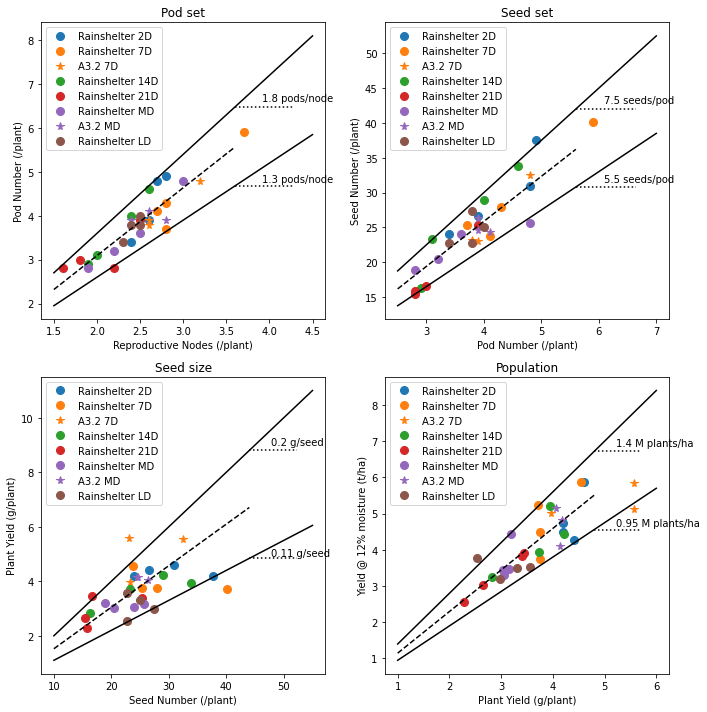

In [45]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
graph = plt.figure(figsize=(10,10))
pos = 1
for n in gParams.columns:
    ax = graph.add_subplot(2,2,pos)
    xvar ,yvar, xmax, xmin, bmax, bmin, slopetext = gParams.loc[:,n].values
    colpos = 0
    for t in Treats:
        for l in ['Rainshelter','A3.2']:
            filt = (HarvDataByPlot.loc[:,'Trial']==l) & (HarvDataByPlot.loc[:,'Irrig']==t)
            if sum(filt) > 0:
                if l == 'A3.2':
                    marker = '*'
                else:
                    marker='o'
                plt.plot(HarvDataByPlot.loc[filt,xvar],HarvDataByPlot.loc[filt,yvar],
                         marker,color=colors[colpos],ms=8,label = l+' '+t)
        colpos+=1
    xs = [float(xmin),float(xmax)]
    plt.plot(xs,[x*float(bmax) for x in xs],'-',color='k')
    plt.plot(xs,[x*float(bmin) for x in xs],'-',color='k')
    xs = [float(xmin),float(xmax)*0.8]
    slope = (HarvDataByPlot.loc[:,yvar]/HarvDataByPlot.loc[:,xvar]).mean()
    plt.plot(xs,[x*slope for x in xs],'--',color='k')
    plt.ylabel(Names.loc[yvar,'Name'] +' ('+ Names.loc[yvar,'Unit'] + ')')
    plt.xlabel(Names.loc[xvar,'Name'] +' ('+ Names.loc[xvar,'Unit'] + ')')
    for b in [float(bmax),float(bmin)]:
        y = float(xmax)*.8 *b
        plt.plot([float(xmax)*.8,float(xmax)*.95],[y,y],':',color='k')
        plt.text(float(xmax)*.87,y*1.02,str(b) + ' ' + slopetext, horizontalalignment='left')
    plt.legend()
    plt.title(n)
    pos+=1
plt.tight_layout()

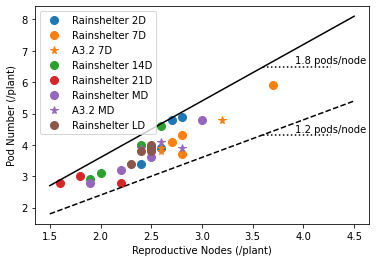

In [26]:
xvar = 'Nodes with Pods'
yvar = 'Pods per plant'
xmax = 4.5
xmin = 1.5
bmax = 1.8
bmin = 1.2
slopetext = 'pods/node'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
colpos = 0
for t in Treats:
    for l in ['Rainshelter','A3.2']:
        filt = (HarvDataByPlot.loc[:,'Trial']==l) & (HarvDataByPlot.loc[:,'Irrig']==t)
            
        if sum(filt) > 0:
            if l == 'A3.2':
                marker = '*'
            else:
                marker='o'
            plt.plot(HarvDataByPlot.loc[filt,xvar],HarvDataByPlot.loc[filt,yvar],
                     marker,color=colors[colpos],ms=8,label = l+' '+t)
    colpos+=1
xs = [xmin,xmax]
plt.plot(xs,[x*bmax for x in xs],'-',color='k')
plt.plot(xs,[x*bmin for x in xs],'--',color='k')
plt.ylabel(Names.loc[yvar,'Name'] +' ('+ Names.loc[yvar,'Unit'] + ')')
plt.xlabel(Names.loc[xvar,'Name'] +' ('+ Names.loc[xvar,'Unit'] + ')')
for b in [bmax,bmin]:
    y = xmax*.8 *b
    plt.plot([xmax*.8,xmax*.95],[y,y],':',color='k')
    plt.text(xmax*.87,y*1.02,str(b) + ' ' + slopetext, horizontalalignment='left')
plt.legend()

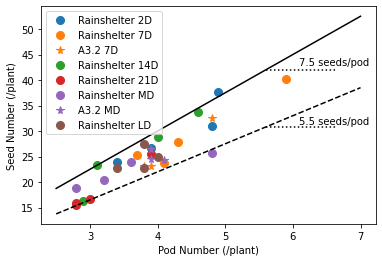

In [27]:
xvar = 'Pods per plant'
yvar = 'Peas per plant'
xmax = 7
xmin = 2.5
bmax = 7.5
bmin = 5.5
slopetext = 'seeds/pod'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
colpos = 0
for t in Treats:
    for l in ['Rainshelter','A3.2']:
        filt = (HarvDataByPlot.loc[:,'Trial']==l) & (HarvDataByPlot.loc[:,'Irrig']==t)
            
        if sum(filt) > 0:
            if l == 'A3.2':
                marker = '*'
            else:
                marker='o'
            plt.plot(HarvDataByPlot.loc[filt,xvar],HarvDataByPlot.loc[filt,yvar],
                     marker,color=colors[colpos],ms=8,label = l+' '+t)
    colpos+=1
xs = [xmin,xmax]
plt.plot(xs,[x*bmax for x in xs],'-',color='k')
plt.plot(xs,[x*bmin for x in xs],'--',color='k')
plt.ylabel(Names.loc[yvar,'Name'] +' ('+ Names.loc[yvar,'Unit'] + ')')
plt.xlabel(Names.loc[xvar,'Name'] +' ('+ Names.loc[xvar,'Unit'] + ')')
for b in [bmax,bmin]:
    y = xmax*.8 *b
    plt.plot([xmax*.8,xmax*.95],[y,y],':',color='k')
    plt.text(xmax*.87,y*1.02,str(b) + ' ' + slopetext, horizontalalignment='left')
plt.legend()

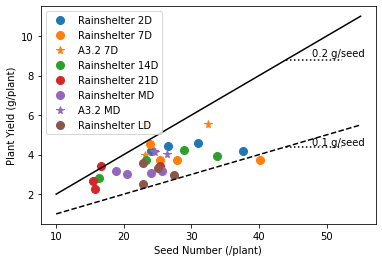

In [28]:
xvar = 'Peas per plant'
yvar = 'Yield per plant'
xmax = 55
xmin = 10
bmax = 0.2
bmin = 0.1
slopetext = 'g/seed'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
colpos = 0
for t in Treats:
    for l in ['Rainshelter','A3.2']:
        filt = (HarvDataByPlot.loc[:,'Trial']==l) & (HarvDataByPlot.loc[:,'Irrig']==t)
            
        if sum(filt) > 0:
            if l == 'A3.2':
                marker = '*'
            else:
                marker='o'
            plt.plot(HarvDataByPlot.loc[filt,xvar],HarvDataByPlot.loc[filt,yvar],
                     marker,color=colors[colpos],ms=8,label = l+' '+t)
    colpos+=1
xs = [xmin,xmax]
plt.plot(xs,[x*bmax for x in xs],'-',color='k')
plt.plot(xs,[x*bmin for x in xs],'--',color='k')
plt.ylabel(Names.loc[yvar,'Name'] +' ('+ Names.loc[yvar,'Unit'] + ')')
plt.xlabel(Names.loc[xvar,'Name'] +' ('+ Names.loc[xvar,'Unit'] + ')')
for b in [bmax,bmin]:
    y = xmax*.8 *b
    plt.plot([xmax*.8,xmax*.95],[y,y],':',color='k')
    plt.text(xmax*.87,y*1.02,str(b) + ' ' + slopetext, horizontalalignment='left')
plt.legend()

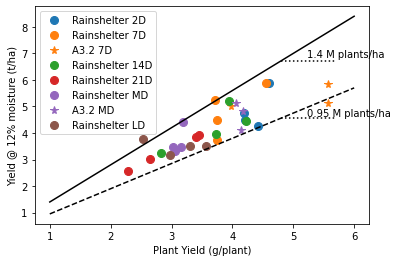

In [29]:
xvar = 'Yield per plant'
yvar = 'Corrected Pea Weight 12%'
xmax = 6
xmin = 1
bmax = 1.4
bmin = 0.95
slopetext = 'M plants/ha'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']
colpos = 0
for t in Treats:
    for l in ['Rainshelter','A3.2']:
        filt = (HarvDataByPlot.loc[:,'Trial']==l) & (HarvDataByPlot.loc[:,'Irrig']==t)
            
        if sum(filt) > 0:
            if l == 'A3.2':
                marker = '*'
            else:
                marker='o'
            plt.plot(HarvDataByPlot.loc[filt,xvar],HarvDataByPlot.loc[filt,yvar],
                     marker,color=colors[colpos],ms=8,label = l+' '+t)
    colpos+=1
xs = [xmin,xmax]
plt.plot(xs,[x*bmax for x in xs],'-',color='k')
plt.plot(xs,[x*bmin for x in xs],'--',color='k')
plt.ylabel(Names.loc[yvar,'Name'] +' ('+ Names.loc[yvar,'Unit'] + ')')
plt.xlabel(Names.loc[xvar,'Name'] +' ('+ Names.loc[xvar,'Unit'] + ')')
for b in [bmax,bmin]:
    y = xmax*.8 *b
    plt.plot([xmax*.8,xmax*.95],[y,y],':',color='k')
    plt.text(xmax*.87,y*1.02,str(b) + ' ' + slopetext, horizontalalignment='left')
plt.legend()

In [ ]:
HarvDataByPlot

In [21]:
names = pd.read_excel('hoko.xlsx',engine='openpyxl')

In [22]:
for x in names.index:
    names.loc[x,['genus','spec']] = names.loc[x,'name'].split(' ',1)

In [23]:
for x in names.index:
    names.loc[x,'genus'] = names.loc[x,'genus'].capitalize()

In [25]:
names.loc[:,['genus','spec']].to_clipboard()